<a href="https://colab.research.google.com/github/IthapePranit/Twitter_sentiment_analysis_NLP/blob/main/Copy_of_Twitter_sentiment_analysis_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter Sentiment Analysis

In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import emoji

In [ ]:
column_names = ["id", "entity", "sentiment", "tweet"]

In [ ]:
df = pd.read_csv("/content/twitter_training.csv", header = None, names= column_names)

In [ ]:
df

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
# Drop unnecessary columns
df = df.drop(labels=["id", "entity"], axis=1)

In [ ]:
# missing rows treatment
print("Missing values  before dropping: {}".format(df.isna().sum()))
# Drop rows with missing values
df.dropna(inplace=True)
print("Missing values after dropping: {}".format(df.isna().sum()))

Missing values  before dropping: sentiment      0
tweet        686
dtype: int64
Missing values count after dropping: sentiment    0
tweet        0
dtype: int64


In [ ]:
# Filter out tweets with less than 5 characters
df = df[df["tweet"].apply(len) > 5]

# Create new features

In [ ]:
# Create a new feature for character length
df["char_len"] = df["tweet"].str.len()

# Create a new feature for word count
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))

# Create a new feature for average word length
df['avg_word_length'] = df['tweet'].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()))

# Set up stop words for further analysis
stop_words = set(stopwords.words('english'))

# Create a new feature for counting stop words
df['stop_words_count'] = df['tweet'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop_words]))

# Create a new feature for counting hashtags
df['hashtag_count'] = df['tweet'].apply(lambda x: str(x).count('#'))

# Create a new feature for counting mentions
df['mention_count'] = df['tweet'].apply(lambda x: str(x).count('@'))

# Create a new feature for counting digits
df['digit_count'] = df['tweet'].apply(lambda x: sum(char.isdigit() for char in str(x)))


In [ ]:
df.columns

Index(['sentiment', 'tweet', 'char_len', 'word_count', 'avg_word_length',
       'stop_words_count', 'hashtag_count', 'mention_count', 'digit_count'],
      dtype='object')

In [ ]:
df

,sentiment,tweet,char_len,word_count,avg_word_length,stop_words_count,hashtag_count,mention_count,digit_count
0,Positive,im getting on borderlands and i will murder yo...,53,11,3.909091,6,0,0,0
1,Positive,I am coming to the borders and I will kill you...,51,12,3.333333,8,0,0,0
2,Positive,im getting on borderlands and i will kill you ...,50,10,4.100000,5,0,0,0
3,Positive,im coming on borderlands and i will murder you...,51,10,4.200000,5,0,0,0
4,Positive,im getting on borderlands 2 and i will murder ...,57,12,3.833333,6,0,0,1
...,...,...,...,...,...,...,...,...,...
74677,Positive,Just realized that the Windows partition of my...,128,26,3.961538,14,0,0,1
74678,Positive,Just realized that my Mac window partition is ...,117,23,4.130435,12,0,0,1
74679,Positive,Just realized the windows partition of my Mac ...,125,25,4.040000,13,0,0,1
74680,Positive,Just realized between the windows partition of...,159,32,4.000000,16,0,0,1


In [ ]:
# Remove unnecessary row with a high hashtag count
df.drop(index=43712, inplace=True)


#Data Visualization

<Axes: ylabel='sentiment'>

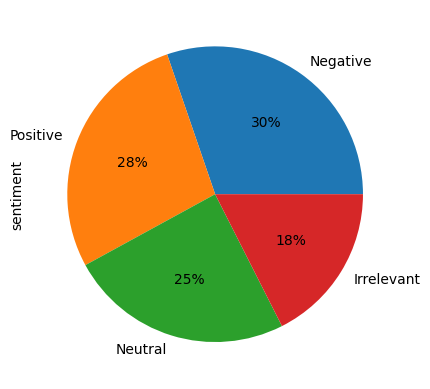

In [ ]:
# Plotting a pie chart to visualize the distribution of sentiment values
df["sentiment"].value_counts().plot(kind = "pie", autopct= "%1.0f%%" )

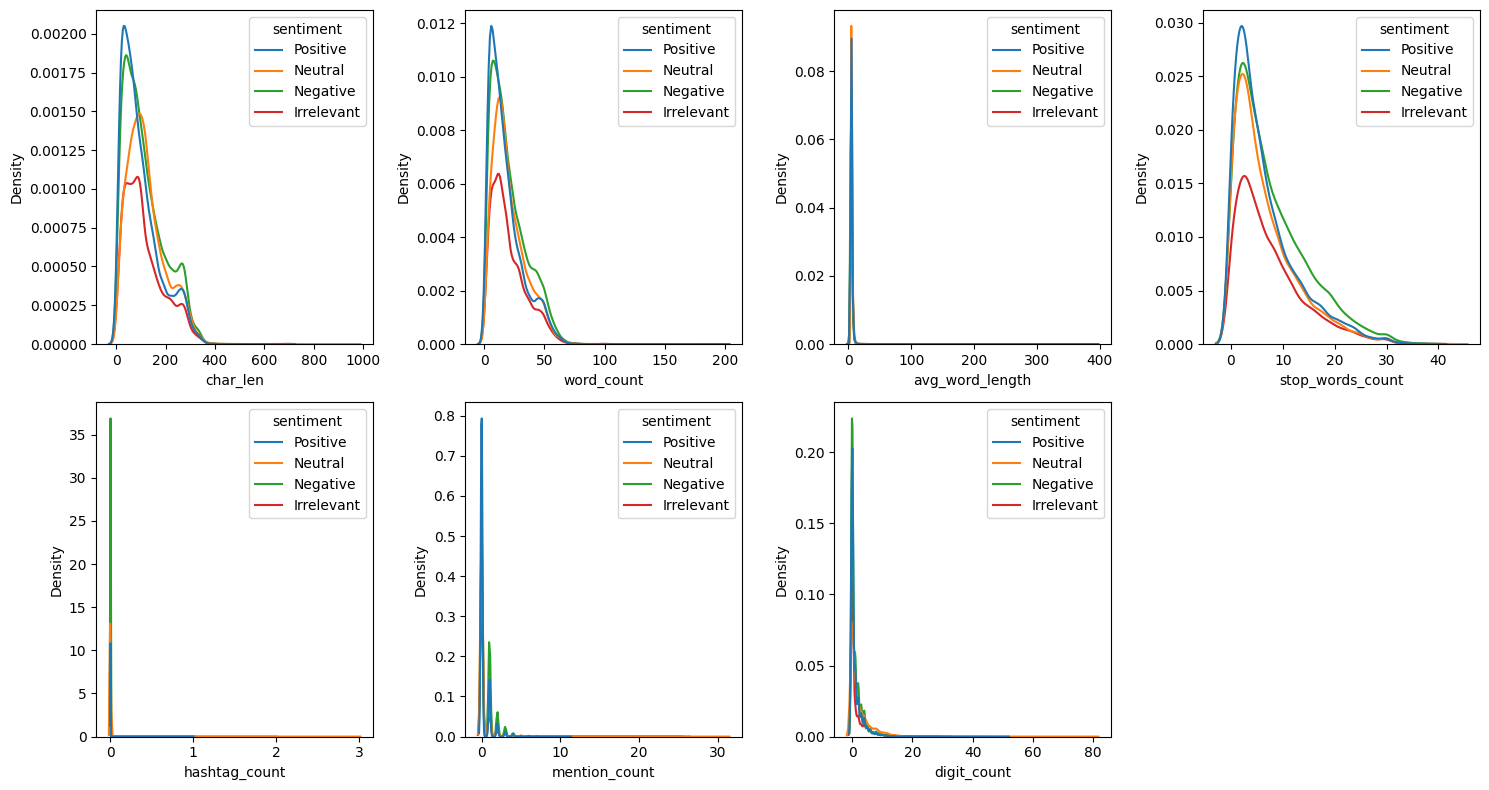

In [ ]:
# Explore data and visualize features
plt.figure(figsize=(15, 8))
num_cols = df.select_dtypes(include="number").columns
for index, col in enumerate(num_cols):
    plt.subplot(2, 4, index + 1)
    sns.kdeplot(data=df, x=col, hue="sentiment", fill=False)
plt.tight_layout()
plt.show()

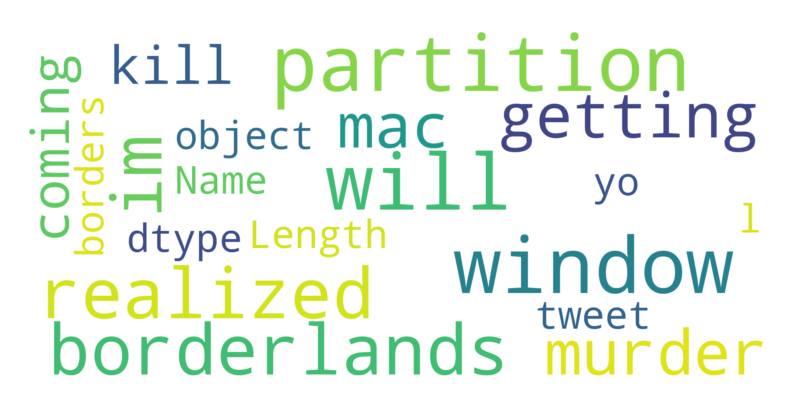

In [ ]:
# Visualize Wordcloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white", stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(
    str(df["tweet"]))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


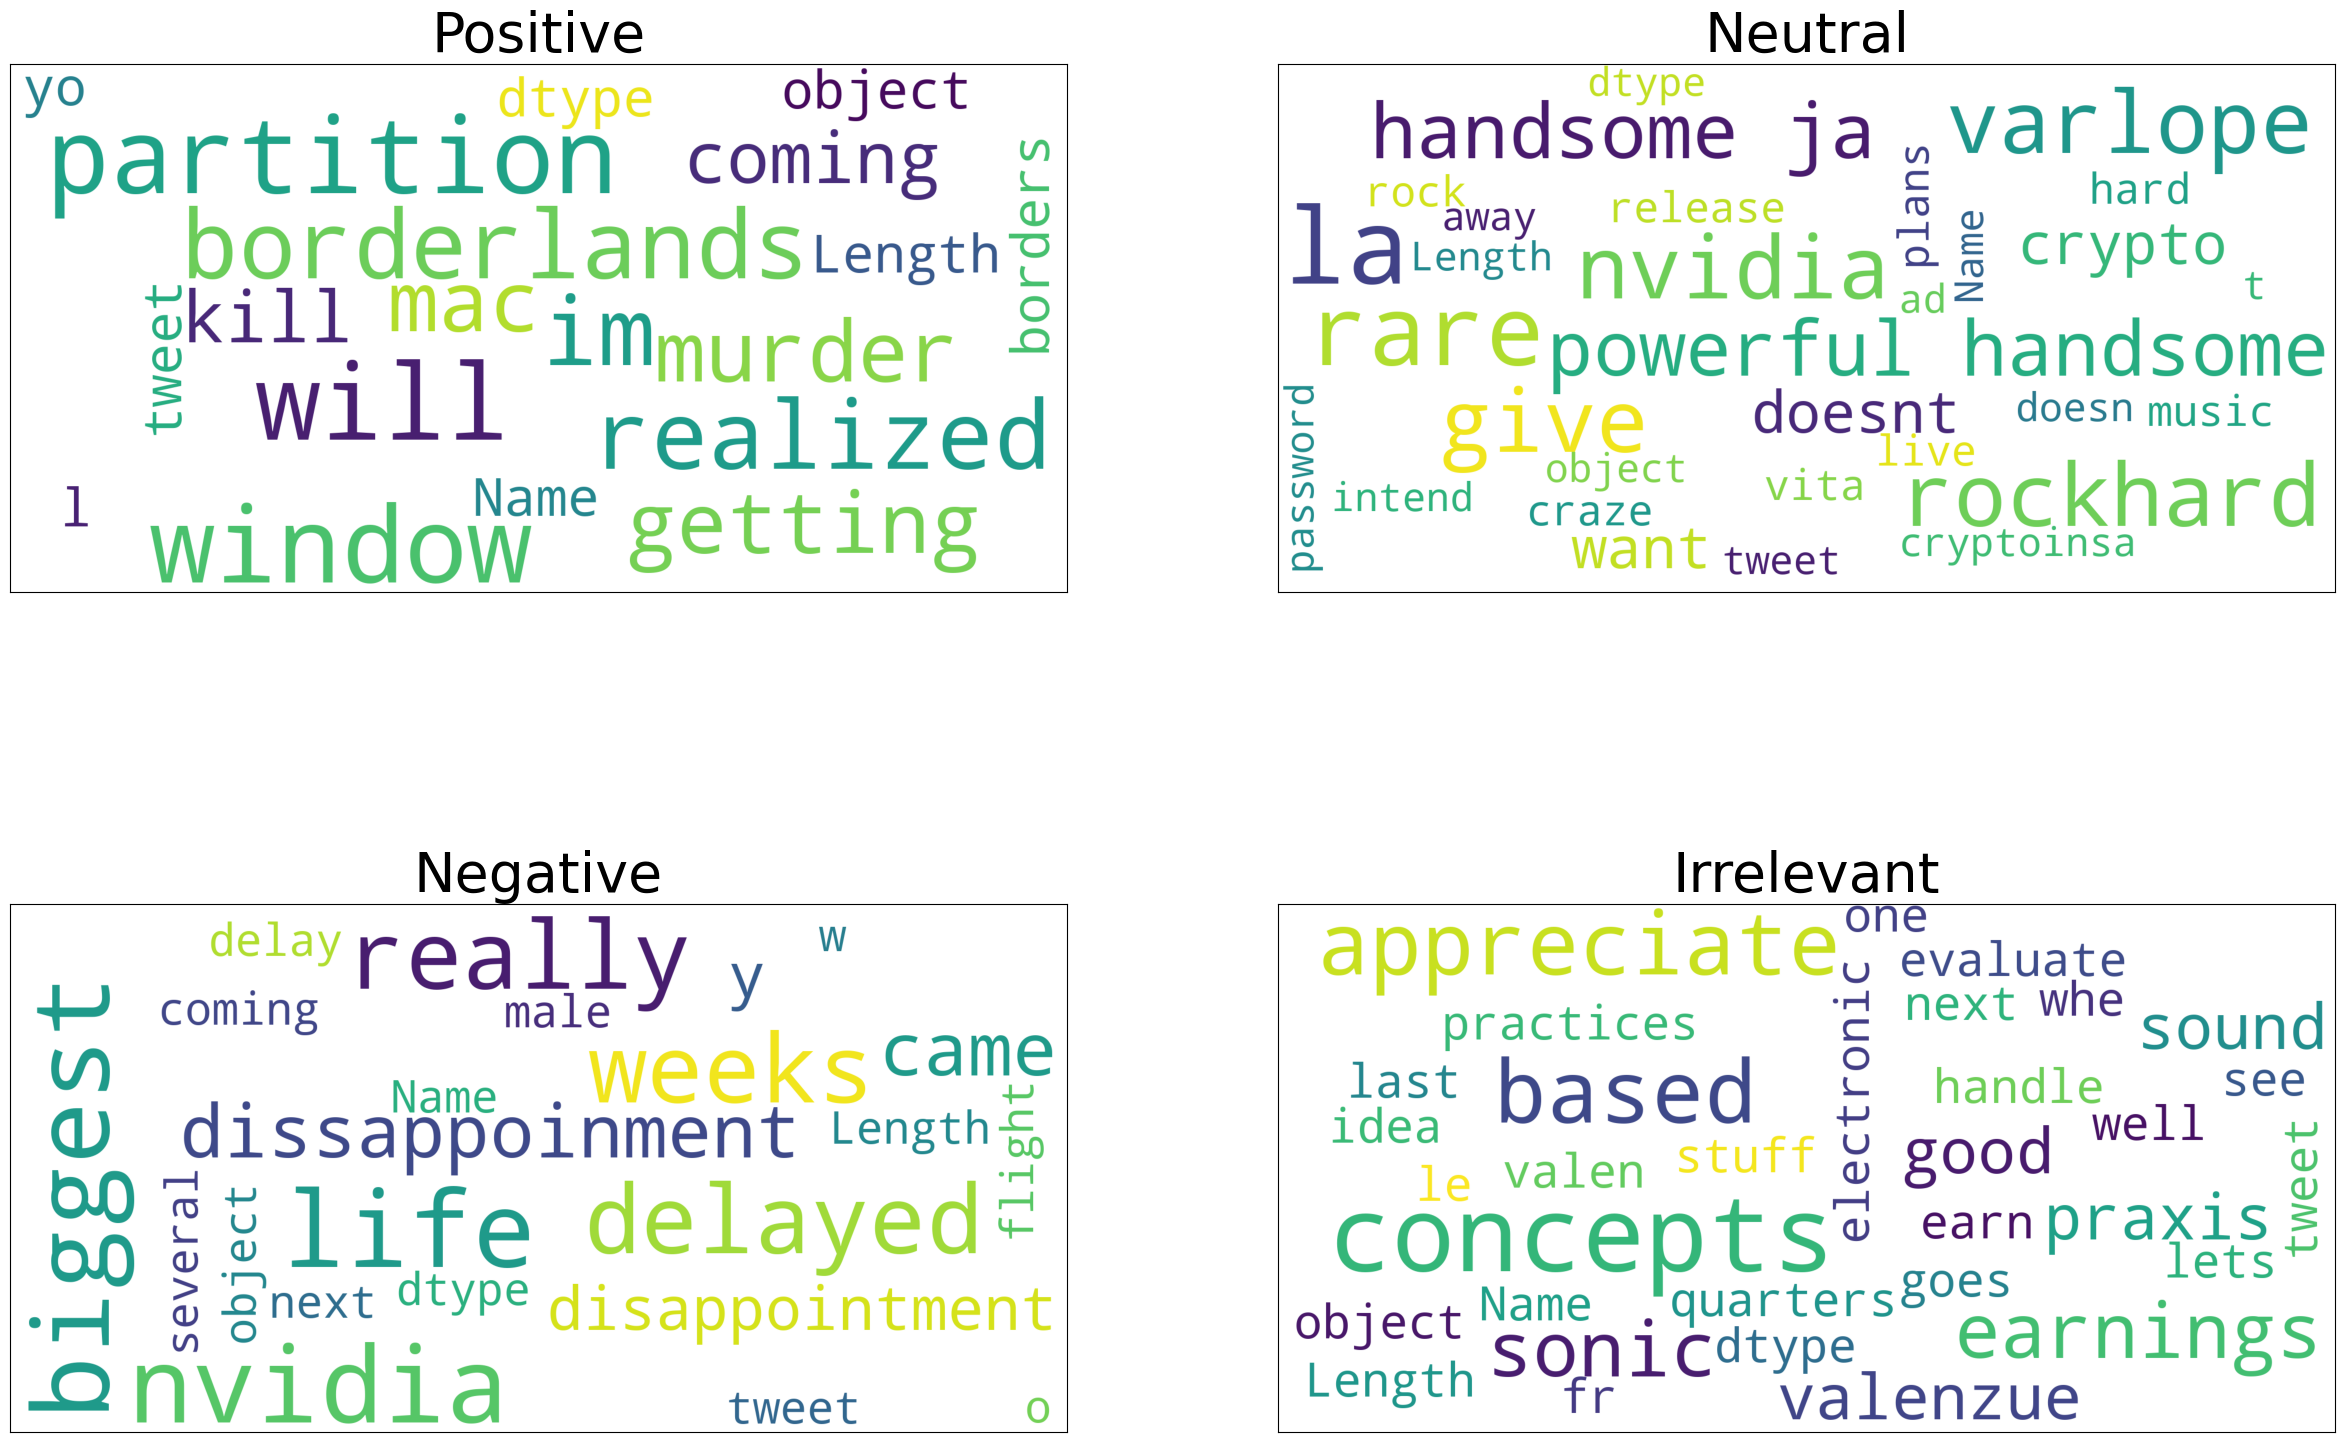

In [ ]:
plt.figure(figsize= (30,20))

for index , sent in enumerate(df["sentiment"].unique()):
  plt.subplot(2,2,index+1)

  data = df[df["sentiment"]==sent]["tweet"]
  wordcloud = WordCloud(background_color="white", stopwords=stopwords, max_words=300,
                        max_font_size=40, scale=5).generate(str(data))
  plt.imshow(wordcloud)
  plt.xticks([])
  plt.yticks([])
  plt.title(sent, fontsize = 40)

# Data Cleaning,

In [ ]:

# Convert text to lowercase
df["tweet"] = df["tweet"].str.lower()

# Remove URLs
df["tweet"] = df["tweet"].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove HTML tags
df["tweet"] = df["tweet"].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

# Remove punctuation
df["tweet"] = df["tweet"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

# Remove special characters
df["tweet"] = df["tweet"].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))

# Convert emojis to text
df["tweet"] = df["tweet"].apply(lambda x: emoji.demojize(x))


<ipython-input-35-ed65d8297599>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df["tweet"] = df["tweet"].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


In [ ]:
# Resetting the index
df.reset_index(drop=True, inplace=True)

#Model

In [ ]:
# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(df["tweet"], df["sentiment"], test_size=0.2, random_state=21)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Define stop words
stop_words = list(stopwords.words('english'))

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(df['tweet'], df['sentiment'], test_size=0.2, random_state=42)

# Create the pipeline
clf = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words=stop_words)),
    ("rfc", RandomForestClassifier())
])

# Fit the model
clf.fit(xtrain, ytrain)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rfc', RandomForestClassifier())])

In [ ]:

# Evaluation
y_pred = clf.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.97      0.87      0.92      2515
    Negative       0.93      0.95      0.94      4316
     Neutral       0.92      0.91      0.91      3575
    Positive       0.89      0.95      0.92      3972

    accuracy                           0.92     14378
   macro avg       0.93      0.92      0.92     14378
weighted avg       0.92      0.92      0.92     14378

